In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
pd.options.display.max_columns=50

# Overview:
Since the death of George Floyd on May May 25, 2020, wide protests against the police are taking place all over the United States as well as other countries on a daily basis.
The main demand of the protesters is to stop the racial bias in the police system.
Following these events, it seems like there's a need for deeper understanding of the way things are going on in terms of law enforcement, mainly in the US.
This work tryies to provide some basic information of the data in the last few years.

# goals:
### There are to main goals to this project:
#### 1) Explore the relationships between certain variables and the chance of being involved in a fatal encounter
#### 2) Trying to predict those chances using different ML classification techniques

## Data Sources:
#### The data was gathered from different places:
* Fatal Police Shootings in the US (2015-2020) - https://www.kaggle.com/andrewmvd/police-deadly-force-usage-us
* Fatal Police Shootings in the US - https://www.kaggle.com/kwullum/fatal-police-shootings-in-the-us
* Crime rate in the United States in 2018, by state - https://www.statista.com/statistics/301549/us-crimes-committed-state/



## working stages:

#### 1) load the data

#### 2) clean the data

#### 3) explore the data

#### 4) handle null values

#### 5) feature engeneering

#### 6) model comparison

#### 7) model selection

#### 8) tuning the model

#### note: part 2-3-4 may often come in a different order, depends on the data.

In [3]:
# Loading the datasets
shootings = pd.read_csv('fatal-police-shootings-data.csv')
census = pd.read_csv('acs2017_census_tract_data.csv')
crime_rate = pd.read_csv('crime_rate.csv')
education = pd.read_csv('completedHSover25.csv', encoding='unicode_escape')



In [4]:
shootings.head()

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

In [5]:
census.head()

TractId    State          County  TotalPop   Men  Women  Hispanic  \
0  1001020100  Alabama  Autauga County      1845   899    946       2.4   
1  1001020200  Alabama  Autauga County      2172  1167   1005       1.1   
2  1001020300  Alabama  Autauga County      3385  1533   1852       8.0   
3  1001020400  Alabama  Autauga County      4267  2001   2266       9.6   
4  1001020500  Alabama  Autauga County      9965  5054   4911       0.9   

   White  Black  Native  Asian  Pacific  VotingAgeCitizen   Income  IncomeErr  \
0   86.3    5.2     0.0    1.2      0.0              1407  67826.0    14560.0   
1   41.6   54.5     0.0    1.0      0.0              1652  41287.0     3819.0   
2   61.4   26.5     0.6    0.7      0.4              2480  46806.0     9496.0   
3   80.3    7.1     0.5    0.2      0.0              3257  55895.0     4369.0   
4   77.5   16.4     0.0    3.1      0.0              7229  68143.0    14424.0   

   IncomePerCap  IncomePerCapErr  Poverty  ChildPoverty  Professional  \
0       33018.0           6294.0     10.7          20.8          38.5   
1       18996.0           2453.0     22.4          35.8          30.5   
2       21236.0           2562.0     14.7          21.1          27.9   
3       28068.0           3190.0      2.3           1.7          29.0   
4       36905.0          10706.0     12.2          17.9          48.8   

   Service  Office  Construction  Production  Drive  Carpool  Transit  Walk  \
0     15.6    22.8          10.8        12.4   94.2      3.3      0.0   0.5   
1     24.9    22.9           6.3        15.4   90.5      9.1      0.0   0.0   
2     19.4    33.3           9.9         9.6   88.3      8.4      0.0   1.0   
3     16.6    25.8           9.1        19.5   82.3     11.2      0.0   1.5   
4     13.8    20.5           3.5        13.4   86.9     11.2      0.0   0.8   

   OtherTransp  WorkAtHome  MeanCommute  Employed  PrivateWork  PublicWork  \
0          0.0         2.1         24.5       881         74.2        21.2   
1          0.5         0.0         22.2       852         75.9        15.0   
2          0.8         1.5         23.1      1482         73.3        21.1   
3          2.9         2.1         25.9      1849         75.8        19.7   
4          0.3         0.7         21.0      4787         71.4        24.1   

   SelfEmployed  FamilyWork  Unemployment  
0           4.5         0.0           4.6  
1           9.0         0.0           3.4  
2           4.8         0.7           4.7  
3           4.5         0.0           6.1  
4           4.5         0.0           2.3

In [6]:
## Changing the state names to their Abbreviations

census.State.replace({'California' : 'CA', 'Texas' : 'TX', 'Florida' : 'FL', 'New York' : 'NY', 'Pennsylvania' : 'PA',
       'Illinois' : 'IL', 'Ohio' : 'OH', 'Georgia' : 'GA', 'North Carolina' : 'NC', 'Michigan' : 'MI',
       'New Jersey' : 'NJ', 'Virginia' : 'VA', 'Washington' : 'WA', 'Arizona' : 'AZ', 'Massachusetts' : 'MA',
       'Tennessee' : 'TN', 'Indiana' : 'IN', 'Missouri' : 'MO', 'Maryland' : 'MD', 'Wisconsin' : 'WI',
       'Colorado' : 'CO', 'Minnesota' : 'MN', 'South Carolina' : 'SC', 'Alabama' : 'AL', 'Louisiana' : 'LA',
       'Kentucky' : 'KY', 'Oregon' : 'OR', 'Oklahoma' : 'OK', 'Connecticut' : 'CT', 'Iowa' : 'IA', 'Utah' : 'UT',
       'Nevada' : 'NV', 'Arkansas' : 'AR', 'Mississippi' : 'MS', 'Kansas' : 'KS', 'New Mexico' : 'NM',
       'Nebraska' : 'NE', 'West Virginia' : 'WV', 'Idaho' : 'ID', 'Hawaii' : 'HI', 'New Hampshire' : 'NH',
       'Maine' : 'ME', 'Montana' : 'MT', 'Rhode Island' : 'RI', 'Delaware' : 'DE', 'South Dakota' : 'SD',
       'North Dakota' : 'ND', 'Alaska' : 'AK', 'District of Columbia' : 'DC', 'Vermont' : 'VT',
       'Wyoming' : 'WY'}, inplace = True)

In [7]:
crime_rate.replace({'California' : 'CA', 'Texas' : 'TX', 'Florida' : 'FL', 'New York' : 'NY', 'Pennsylvania' : 'PA',
       'Illinois' : 'IL', 'Ohio' : 'OH', 'Georgia' : 'GA', 'North Carolina' : 'NC', 'Michigan' : 'MI',
       'New Jersey' : 'NJ', 'Virginia' : 'VA', 'Washington' : 'WA', 'Arizona' : 'AZ', 'Massachusetts' : 'MA',
       'Tennessee' : 'TN', 'Indiana' : 'IN', 'Missouri' : 'MO', 'Maryland' : 'MD', 'Wisconsin' : 'WI',
       'Colorado' : 'CO', 'Minnesota' : 'MN', 'South Carolina' : 'SC', 'Alabama' : 'AL', 'Louisiana' : 'LA',
       'Kentucky' : 'KY', 'Oregon' : 'OR', 'Oklahoma' : 'OK', 'Connecticut' : 'CT', 'Iowa' : 'IA', 'Utah' : 'UT',
       'Nevada' : 'NV', 'Arkansas' : 'AR', 'Mississippi' : 'MS', 'Kansas' : 'KS', 'New Mexico' : 'NM',
       'Nebraska' : 'NE', 'West Virginia' : 'WV', 'Idaho' : 'ID', 'Hawaii' : 'HI', 'New Hampshire' : 'NH',
       'Maine' : 'ME', 'Montana' : 'MT', 'Rhode Island' : 'RI', 'Delaware' : 'DE', 'South Dakota' : 'SD',
       'North Dakota' : 'ND', 'Alaska' : 'AK', 'District of Columbia' : 'DC', 'Vermont' : 'VT',
       'Wyoming' : 'WY'}, inplace = True)

In [8]:
education.isnull().sum()

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

In [9]:
### Drop null values from the education dataset

education = education.drop(education.loc[education['percent_completed_hs']=='-'].index)
education.rename(columns={'Geographic Area':'state'}, inplace=True)
education.percent_completed_hs = education.percent_completed_hs.astype(float)

In [10]:
census.columns

Index(['TractId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [11]:
## Dropping puerto rico since it only appears in the census dataset

census.drop(census[census.State == 'Puerto Rico'].index, inplace=True)
census.rename(columns = {'State':'state'}, inplace=True)

In [12]:
### Creating a dataset for Total population by state and man/women ratio

In [13]:
pop = pd.DataFrame(census.groupby(by='state')[('TotalPop', 'Men', 'Women')].sum()).reset_index()

C:\Users\guy\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [14]:
pop['Men_ratio'] = pop.Men/pop.TotalPop
pop['Women_ratio'] = pop.Women/pop.TotalPop
pop.head()

state  TotalPop       Men     Women  Men_ratio  Women_ratio
0    AK    738565    386319    352246   0.523067     0.476933
1    AL   4850771   2350806   2499965   0.484625     0.515375
2    AR   2977944   1461651   1516293   0.490826     0.509174
3    AZ   6809946   3385055   3424891   0.497075     0.502925
4    CA  38982847  19366579  19616268   0.496797     0.503203

In [15]:
## creating a dataframe for ratios of race as a percent of total population by each state
race_ratios = pd.DataFrame({'state':[x for x in census.state.unique()]})

In [16]:
def get_share(race):
    countries = [x for x in race_ratios.state]
    share = []
    for country in countries:
            share.append(((census[race].loc[census['state']==country]*census.TotalPop.loc[census['state']==country])/
                    (census.TotalPop.loc[census['state']==country]).sum()).sum())
    race_ratios[race] = share
        

In [17]:
get_share('White')
get_share('Black')
get_share('Hispanic')
get_share('Native')
get_share('Asian')
get_share('Pacific')

In [18]:
race_ratios.head()

state      White      Black   Hispanic     Native      Asian   Pacific
0    AL  65.930038  26.408666   4.088196   0.465869   1.278853  0.029971
1    AK  61.538304   3.056269   6.796547  13.768733   6.057875  1.190426
2    AZ  55.601463   4.054267  30.888347   3.915325   3.043925  0.176447
3    AR  73.013810  15.351735   7.161115   0.569548   1.406086  0.234395
4    CA  37.908368   5.544827  38.749987   0.353409  13.923941  0.354567

In [19]:
## creating a dataframe for rates of socio-economic factors for each states
# using the median for number of voting age citizens, income, and income per capita

socio_eco_factors = pd.DataFrame(census.groupby(by='state')[('VotingAgeCitizen','Income', 'IncomePerCap')].median()).reset_index()


C:\Users\guy\miniconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [20]:
def get_rated(data):
    countries = [x for x in socio_eco_factors.state]
    columns = ['Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment']
    for column in (columns):
        rate = []
        for country in (countries):
            rate.append(((census[column].loc[census['state']==country]*census.TotalPop.loc[census['state']==country])/
                (census.TotalPop.loc[census['state']==country]).sum()).sum())
        socio_eco_factors[column] = rate
        

In [21]:
get_rated(socio_eco_factors)

In [22]:
socio_eco_factors.head()

state  VotingAgeCitizen   Income  IncomePerCap    Poverty  ChildPoverty  \
0    AK            3311.0  72471.0       33194.5  10.189025     13.439155   
1    AL            2857.0  41757.5       22174.0  18.166942     25.634724   
2    AR            3006.5  41301.0       22018.0  18.352749     25.397980   
3    AZ            2907.5  51514.0       26125.0  17.170370     22.524003   
4    CA            2921.0  65758.0       29054.5  15.160541     18.928021   

   Professional    Service     Office  Construction  Production      Drive  \
0     36.344760  17.605478  22.881520     12.502602   10.666676  67.231226   
1     32.767604  17.066305  23.593333      9.911812   16.658813  85.522449   
2     32.085530  17.367321  23.227318     10.722012   16.598132  82.683749   
3     34.301709  20.179820  25.784445      9.580030   10.012379  76.155885   
4     36.526169  18.996691  23.128153      9.639820   11.533099  73.806324   

     Carpool   Transit      Walk  OtherTransp  WorkAtHome  MeanCommute  \
0  12.250652  1.454908  8.385811     6.114125    4.566151    19.162686   
1   8.777685  0.410492  1.232315     1.052020    3.003208    24.703109   
2  10.621151  0.386268  1.822285     1.264949    3.219735    21.716259   
3  11.093449  1.944451  2.073931     2.595039    5.994868    25.221217   
4  10.656175  4.833611  2.597862     2.499113    5.431947    28.796720   

      Employed  PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
0  2713.982869    66.871808   26.721727      6.182757    0.221175   
1  2296.709808    78.961780   15.647968      5.197778    0.189392   
2  2295.915283    77.879048   15.765584      6.175886    0.181290   
3  2326.211026    78.926897   14.513907      6.255523    0.163304   
4  2658.708856    77.829875   13.766153      8.052346    0.175714   

   Unemployment  
0      8.157018  
1      7.750819  
2      6.444187  
3      7.396296  
4      7.875660

In [23]:
## merging the main dataframe with the ratios by race and the socio economic factors

df=shootings.merge(pop,on='state').merge(race_ratios,on='state').merge(socio_eco_factors, on='state')

In [24]:
df.head()

id                     name        date   manner_of_death       armed  \
0    3               Tim Elliot  2015-01-02              shot         gun   
1  138  Antonio Zambrano-Montes  2015-02-10  shot and Tasered     unarmed   
2  295       Jamison  Childress  2015-03-19              shot     unarmed   
3  393       Daniel Covarrubias  2015-04-21              shot     unarmed   
4  431               Roark Cook  2015-05-04              shot  toy weapon   

    age gender race       city state  signs_of_mental_illness threat_level  \
0  53.0      M    A    Shelton    WA                     True       attack   
1  35.0      M    H      Pasco    WA                     True        other   
2  20.0      M    W      Sumas    WA                     True       attack   
3  37.0      M    N   Lakewood    WA                     True        other   
4  36.0      M    W  Kennewick    WA                     True       attack   

          flee  body_camera  TotalPop      Men    Women  Men_ratio  \
0  Not fleeing        False   7169967  3580888  3589079   0.499429   
1         Foot        False   7169967  3580888  3589079   0.499429   
2  Not fleeing        False   7169967  3580888  3589079   0.499429   
3         Foot        False   7169967  3580888  3589079   0.499429   
4  Not fleeing        False   7169967  3580888  3589079   0.499429   

   Women_ratio      White     Black   Hispanic    Native     Asian   Pacific  \
0     0.500571  69.757044  3.508693  12.302123  1.113692  7.998513  0.619826   
1     0.500571  69.757044  3.508693  12.302123  1.113692  7.998513  0.619826   
2     0.500571  69.757044  3.508693  12.302123  1.113692  7.998513  0.619826   
3     0.500571  69.757044  3.508693  12.302123  1.113692  7.998513  0.619826   
4     0.500571  69.757044  3.508693  12.302123  1.113692  7.998513  0.619826   

   VotingAgeCitizen   Income  IncomePerCap    Poverty  ChildPoverty  \
0            3340.0  64780.5       31049.5  12.444626     15.369508   
1            3340.0  64780.5       31049.5  12.444626     15.369508   
2            3340.0  64780.5       31049.5  12.444626     15.369508   
3            3340.0  64780.5       31049.5  12.444626     15.369508   
4            3340.0  64780.5       31049.5  12.444626     15.369508   

   Professional    Service     Office  Construction  Production      Drive  \
0     39.069443  17.301496  21.942235     10.081146   11.605325  73.126371   
1     39.069443  17.301496  21.942235     10.081146   11.605325  73.126371   
2     39.069443  17.301496  21.942235     10.081146   11.605325  73.126371   
3     39.069443  17.301496  21.942235     10.081146   11.605325  73.126371   
4     39.069443  17.301496  21.942235     10.081146   11.605325  73.126371   

    Carpool   Transit      Walk  OtherTransp  WorkAtHome  MeanCommute  \
0  10.17665  5.734172  3.295853     1.987535    5.679548    27.051709   
1  10.17665  5.734172  3.295853     1.987535    5.679548    27.051709   
2  10.17665  5.734172  3.295853     1.987535    5.679548    27.051709   
3  10.17665  5.734172  3.295853     1.987535    5.679548    27.051709   
4  10.17665  5.734172  3.295853     1.987535    5.679548    27.051709   

      Employed  PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
0  2726.098361    77.577576    16.38124      5.864923    0.176045   
1  2726.098361    77.577576    16.38124      5.864923    0.176045   
2  2726.098361    77.577576    16.38124      5.864923    0.176045   
3  2726.098361    77.577576    16.38124      5.864923    0.176045   
4  2726.098361    77.577576    16.38124      5.864923    0.176045   

   Unemployment  
0      6.170674  
1      6.170674  
2      6.170674  
3      6.170674  
4      6.170674

In [25]:
## creating a feature for the proportions of victims by race

df['percent_killed_race'] = df.race.apply(lambda x: df[df['race']==x].shape[0] / df.shape[0] * 100)

In [26]:
df.race.replace({'A':'Asian', 'H':'Hispanic','W':'White','N':'Native','B':'Black'}, inplace=True)

# Handling null values approach:
#### As for the age, i decided to fill the null values with the median based on the city and state
#### For Gender, I filled the nulls with Male, as it seems the the majority of the victims are males, regardless any other factors
#### For 'flee', 'armed', and 'race', i filled the nulls with 'Unknown'


In [27]:
df[df['race'].isnull()]

id                  name        date   manner_of_death  \
31    1825          Justin Baker  2016-08-30  shot and Tasered   
38    2022   Edward Lowell Hills  2016-11-05              shot   
52    2641     David W. Hamilton  2017-06-06              shot   
70    3026          Daniel James  2017-10-10              shot   
72    3164  Christopher Escobedo  2017-11-27              shot   
...    ...                   ...         ...               ...   
5268  1136    John Randell Veach  2015-12-30              shot   
5294  2271            Val Thomas  2017-01-29              shot   
5319  3513                 TK TK  2018-03-14              shot   
5321  4331      Matthew Lorenzen  2018-11-30              shot   
5332  4935          Mark Johnson  2019-08-09              shot   

               armed   age gender race           city state  \
31         chain saw  36.0      M  NaN         Graham    WA   
38               gun  59.0      M  NaN         Beaver    WA   
52               gun  50.0      M  NaN      Vancouver    WA   
70               gun  55.0      M  NaN      Rochester    WA   
72               gun  26.0      M  NaN         Yakima    WA   
...              ...   ...    ...  ...            ...   ...   
5268    undetermined  39.0      M  NaN        Rawlins    WY   
5294           Taser  53.0      M  NaN        Oakdale    CT   
5319  unknown weapon   NaN      M  NaN       Parmelee    SD   
5321             gun  19.0      M  NaN  New Underwood    SD   
5332      toy weapon  62.0      M  NaN     Montpelier    VT   

      signs_of_mental_illness  threat_level         flee  body_camera  \
31                       True        attack  Not fleeing        False   
38                      False  undetermined          NaN        False   
52                      False        attack          Car        False   
70                       True        attack          NaN        False   
72                      False        attack          Car        False   
...                       ...           ...          ...          ...   
5268                    False  undetermined          NaN        False   
5294                     True        attack  Not fleeing        False   
5319                    False         other          NaN        False   
5321                     True        attack          Car        False   
5332                     True        attack  Not fleeing        False   

      TotalPop      Men    Women  Men_ratio  Women_ratio      White     Black  \
31     7169967  3580888  3589079   0.499429     0.500571  69.757044  3.508693   
38     7169967  3580888  3589079   0.499429     0.500571  69.757044  3.508693   
52     7169967  3580888  3589079   0.499429     0.500571  69.757044  3.508693   
70     7169967  3580888  3589079   0.499429     0.500571  69.757044  3.508693   
72     7169967  3580888  3589079   0.499429     0.500571  69.757044  3.508693   
...        ...      ...      ...        ...          ...        ...       ...   
5268    583200   298301   284899   0.511490     0.488510  84.302693  0.994211   
5294   3594478  1754046  1840432   0.487984     0.512016  68.050884  9.761599   
5319    855444   430587   424857   0.503349     0.496651  82.684191  1.672939   
5321    855444   430587   424857   0.503349     0.496651  82.684191  1.672939   
5332    624636   308026   316610   0.493129     0.506871  93.242448  1.205362   

       Hispanic    Native     Asian   Pacific  VotingAgeCitizen   Income  \
31    12.302123  1.113692  7.998513  0.619826            3340.0  64780.5   
38    12.302123  1.113692  7.998513  0.619826            3340.0  64780.5   
52    12.302123  1.113692  7.998513  0.619826            3340.0  64780.5   
70    12.302123  1.113692  7.998513  0.619826            3340.0  64780.5   
72    12.302123  1.113692  7.998513  0.619826            3340.0  64780.5   
...         ...       ...       ...       ...               ...      ...   
5268   9.713225  2.051373  0.841040  0.063058            3102.5  61447.0   


In [28]:
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      240
age                        249
gender                       2
race                       607
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       250
body_camera                  0
TotalPop                     0
Men                          0
Women                        0
Men_ratio                    0
Women_ratio                  0
White                        0
Black                        0
Hispanic                     0
Native                       0
Asian                        0
Pacific                      0
VotingAgeCitizen             0
Income                       0
IncomePerCap                 0
Poverty                      0
ChildPoverty                 0
Professional                 0
Service                      0
Office  

In [29]:
## Function to fill the null age values based on the city and state

def set_med(data, col, col2, col3):
    index_nan = list(data[col][data[col].isnull()].index)
    for i in index_nan:
        state_med = data[col][((data[col2] == data.loc[i][col2]))].median()
        med_fill = data[col][((data[col2] == data.loc[i][col2]) & (data[col3] == data.loc[i][col3]))].median()
        if not np.isnan(med_fill):                  
            data[col].loc[i] = med_fill
        else: data[col].loc[i] = state_med


In [30]:
set_med(df, 'age', 'state', 'city')

C:\Users\guy\miniconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\guy\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [31]:
df.race.fillna(value='Unknown', inplace= True)
df.flee.fillna(value='Unknown', inplace= True)
df.armed.fillna(value='Unknown', inplace= True)
df.gender.fillna(value='M', inplace= True)

In [32]:
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
TotalPop                   0
Men                        0
Women                      0
Men_ratio                  0
Women_ratio                0
White                      0
Black                      0
Hispanic                   0
Native                     0
Asian                      0
Pacific                    0
VotingAgeCitizen           0
Income                     0
IncomePerCap               0
Poverty                    0
ChildPoverty               0
Professional               0
Service                    0
Office                     0
Construction               0
Production    

## Alright, no more null values, Moving on
### First Question: What is the relationship between the victims and their proportion of the total population in terms of race?
#### To find out:
* I first created a dataframe with a column for race
* Then, created a column of it's share of the total population by dividing the sum of 'TotalPop' in the census data.
* After that, another column was created for percentage of victims by dividing the total number of victims for each race by the total number of victims

In [33]:
races = pd.DataFrame({'race' : ['Hispanic', 'White',
       'Black', 'Native', 'Asian']})

In [34]:
population = census['TotalPop'].sum()

In [35]:
df.head()

id                     name        date   manner_of_death       armed  \
0    3               Tim Elliot  2015-01-02              shot         gun   
1  138  Antonio Zambrano-Montes  2015-02-10  shot and Tasered     unarmed   
2  295       Jamison  Childress  2015-03-19              shot     unarmed   
3  393       Daniel Covarrubias  2015-04-21              shot     unarmed   
4  431               Roark Cook  2015-05-04              shot  toy weapon   

    age gender      race       city state  signs_of_mental_illness  \
0  53.0      M     Asian    Shelton    WA                     True   
1  35.0      M  Hispanic      Pasco    WA                     True   
2  20.0      M     White      Sumas    WA                     True   
3  37.0      M    Native   Lakewood    WA                     True   
4  36.0      M     White  Kennewick    WA                     True   

  threat_level         flee  body_camera  TotalPop      Men    Women  \
0       attack  Not fleeing        False   7169967  3580888  3589079   
1        other         Foot        False   7169967  3580888  3589079   
2       attack  Not fleeing        False   7169967  3580888  3589079   
3        other         Foot        False   7169967  3580888  3589079   
4       attack  Not fleeing        False   7169967  3580888  3589079   

   Men_ratio  Women_ratio      White     Black   Hispanic    Native     Asian  \
0   0.499429     0.500571  69.757044  3.508693  12.302123  1.113692  7.998513   
1   0.499429     0.500571  69.757044  3.508693  12.302123  1.113692  7.998513   
2   0.499429     0.500571  69.757044  3.508693  12.302123  1.113692  7.998513   
3   0.499429     0.500571  69.757044  3.508693  12.302123  1.113692  7.998513   
4   0.499429     0.500571  69.757044  3.508693  12.302123  1.113692  7.998513   

    Pacific  VotingAgeCitizen   Income  IncomePerCap    Poverty  ChildPoverty  \
0  0.619826            3340.0  64780.5       31049.5  12.444626     15.369508   
1  0.619826            3340.0  64780.5       31049.5  12.444626     15.369508   
2  0.619826            3340.0  64780.5       31049.5  12.444626     15.369508   
3  0.619826            3340.0  64780.5       31049.5  12.444626     15.369508   
4  0.619826            3340.0  64780.5       31049.5  12.444626     15.369508   

   Professional    Service     Office  Construction  Production      Drive  \
0     39.069443  17.301496  21.942235     10.081146   11.605325  73.126371   
1     39.069443  17.301496  21.942235     10.081146   11.605325  73.126371   
2     39.069443  17.301496  21.942235     10.081146   11.605325  73.126371   
3     39.069443  17.301496  21.942235     10.081146   11.605325  73.126371   
4     39.069443  17.301496  21.942235     10.081146   11.605325  73.126371   

    Carpool   Transit      Walk  OtherTransp  WorkAtHome  MeanCommute  \
0  10.17665  5.734172  3.295853     1.987535    5.679548    27.051709   
1  10.17665  5.734172  3.295853     1.987535    5.679548    27.051709   
2  10.17665  5.734172  3.295853     1.987535    5.679548    27.051709   
3  10.17665  5.734172  3.295853     1.987535    5.679548    27.051709   
4  10.17665  5.734172  3.295853     1.987535    5.679548    27.051709   

      Employed  PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
0  2726.098361    77.577576    16.38124      5.864923    0.176045   
1  2726.098361    77.577576    16.38124      5.864923    0.176045   
2  2726.098361    77.577576    16.38124      5.864923    0.176045   
3  2726.098361    77.577576    16.38124      5.864923    0.176045   
4  2726.098361    77.577576    16.38124      5.864923    0.176045   

   Unemployment  percent_killed_race  
0      6.170674             1.704758  
1      6.170674            16.448108  
2      6.170674            44.679655  
3      6.170674             1.423754  
4      6.170674            44.679655

In [36]:
races['Share Of Population'] = races['race'].apply(lambda x: census.apply(lambda y: y[x]*y['TotalPop']/population, axis=1).sum())

In [37]:
races['Percent Killed By The Police'] = races['race'].apply(lambda x: len(df[df['race']==x])/len(df))*100

In [38]:
races

race  Share Of Population  Percent Killed By The Police
0  Hispanic            17.604358                     16.448108
1     White            61.456573                     44.679655
2     Black            12.288051                     23.491945
3    Native             0.653657                      1.423754
4     Asian             5.292662                      1.704758

In [39]:
races.head()

race  Share Of Population  Percent Killed By The Police
0  Hispanic            17.604358                     16.448108
1     White            61.456573                     44.679655
2     Black            12.288051                     23.491945
3    Native             0.653657                      1.423754
4     Asian             5.292662                      1.704758

In [40]:
races_plot=races.melt(id_vars='race')

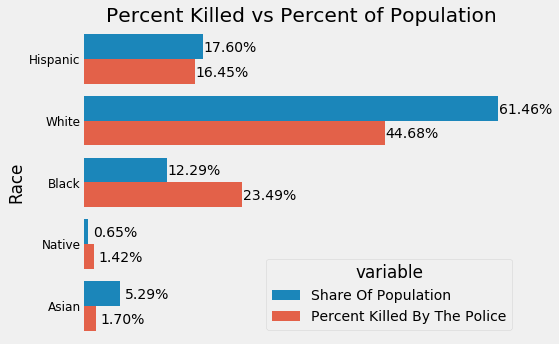

In [41]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1,1,figsize = (8,5))
sns.barplot('value', 'race',hue='variable', data=races_plot, ax=ax )
for i in ax.patches:
    width = i.get_width()
    plt.text(4+i.get_width(), i.get_y()+0.55*i.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')
ax.tick_params(axis='both', labelsize=12)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_title('Percent Killed vs Percent of Population')
ax.set_xlabel('')
ax.set_ylabel('Race')
ax.set_xticks([])
plt.tight_layout()

### Alright, so we do see some big differences -  mostly for the black and white populations:
* the data suggests that the correlations between blacks and whites are in the opposite directions: while the percent of white victims is *lower* then their proportion of the population, black victims percentage is *bigger*.
* It's important to note though - we obviously cannot conclude if there's a bias or racism based on mere statistics, but getting to know the data is important for further investigation. 

# Question Number Two
## Is the number of victims has been on the rise for the past few years like many of the protesters and the media suggest?
#### We'll have a look at the data from to different angles:
1) Compare the number of victims for each race over time using matplotlib plot

2) compare total number of victims over time usin seaborn regplot

In [42]:
## creating a year column in the df dataset

df.date = pd.to_datetime(df.date)
df['year'] = df['date'].apply(lambda x: x.year)

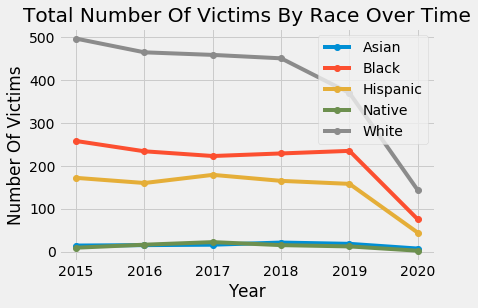

In [43]:
## plotting the number of victims by creating a pivot table based on year and race

g = df[(df['race']!='Unknown') & (df['race']!='O')].pivot_table('id','year','race',aggfunc='count').plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Number Of Victims')
t = plt.title('Total Number Of Victims By Race Over Time')
f = plt.legend()


### Wow, actually that seems like a big insight.
#### This graph clearly shows that the number of victims is quite steady for most of the races, but the white number of victims has shown a small decrease in 2019
####  As for the 'fall' in 2020, let's not forget that we're only half way through the year and from what's shown here it's probably gonna end at the same point as the past years.
#### Let's have a deeper look at the question and compare the number of victims by month!

In [44]:
## grouping the data by month and converting the month to ordinal values so we can plot them afterwards

by_month = df.groupby(pd.Grouper(key='date' ,freq='M')).count().reset_index()[['date', 'id']]
by_month['date_ordinal'] = by_month['date'].apply(lambda x: x.toordinal())


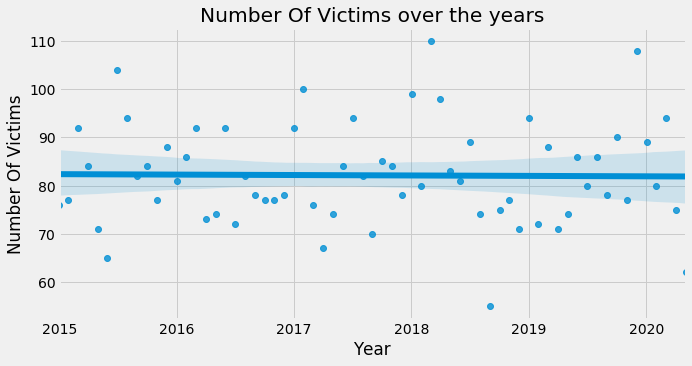

In [45]:
## plotting
years = df.year.unique()
fig, ax = plt.subplots(1,1,figsize = (10,5))
sns.regplot(by_month['date_ordinal'], by_month['id'],ci=95, ax=ax)
labels = [by_month['date_ordinal'].min() + (x * 365) for x in range(6)]
ax.set_xticks(labels)
labels = ax.set_xticklabels(years)
ax.set_xlabel('Year')
l = ax.set_ylabel('Number Of Victims')
t = plt.title('Number Of Victims over the years')



### Big lesson here - when diving deeper and scaling down to months instead of years, we cannot see any difference in the total number of victims. the somewhat good news are that although the numbers didn't decrease, they didn't increase either, as oppposed to what many people think or say 

# Question number three
## How other categorial factors in the data are distributed

In [46]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'TotalPop', 'Men', 'Women', 'Men_ratio',
       'Women_ratio', 'White', 'Black', 'Hispanic', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'Income', 'IncomePerCap', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'percent_killed_race',
       'year'],
      dtype='object')

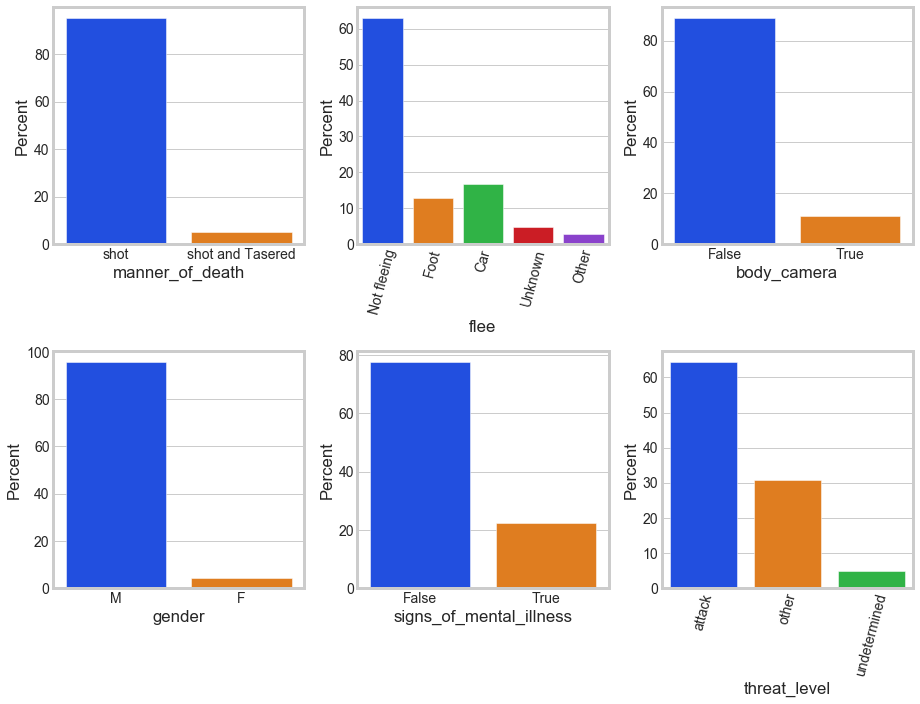

In [47]:
sns.set_style('whitegrid')
plt.subplots(3,2, figsize=(13,10))
#fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(3,3, figsize=(10,8))
cols = ['manner_of_death', 'flee', 'body_camera', 'gender', 'signs_of_mental_illness','threat_level']
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.barplot(x=df[cols[i]], y=df[cols[i]],orient='v', estimator=lambda x:len(x)/len(df)*100, palette='bright').set(ylabel='Percent')
    if len(df[cols[i]].unique()) >= 3:
        plt.xticks(rotation=75)
plt.tight_layout()

## Insights:
* Most of the victims were not fleeing
* More then 70 percent of the victims didn't have signs of mental illness
* Important one - more then 60 percent of the victims are labeled as "attackers"
* More than 90 percent are males

# Age and it's distribution by race

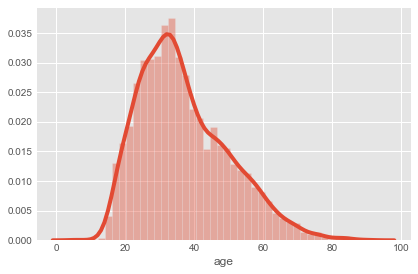

In [48]:
plt.style.use('ggplot')
g = sns.distplot(df['age'])

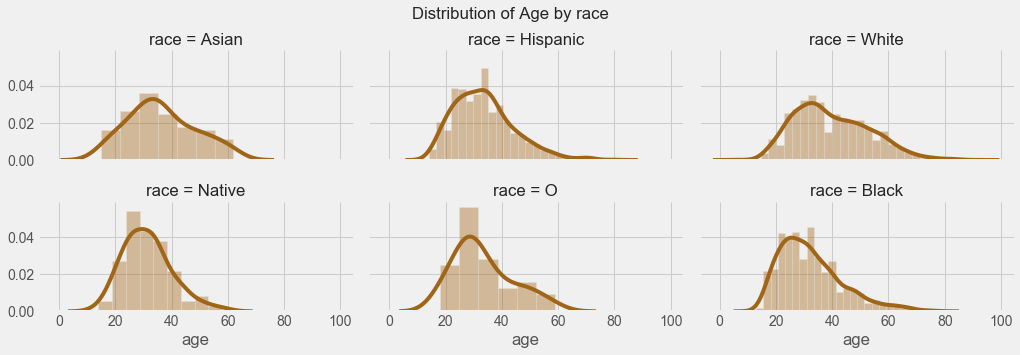

In [49]:
plt.style.use('fivethirtyeight')
sns.set_palette('BrBG')
g = sns.FacetGrid(df[df['race']!='Unknown'],col ='race',col_wrap=3, height=2.4, aspect=2)
g = g.map(sns.distplot, 'age')
title = plt.suptitle('Distribution of Age by race',x=0.5, y=1.03)
plt.tight_layout()

* Doesn't seem like there's any difference victims' age for a specific race

# Question Number Four
## Is their any difference between armed and unarmed victims?
#### To answer this question:
* First, I reduced the number of values for the feature 'armed' to the most common ones
* Second, I created a column which specifies if the victim was armed or not
* Lastly, I created a dataframe for armed and unarmed victims and compared them

In [50]:
### reducing the armed column values

df.armed.replace({'undetermined':'Unknown'}, inplace=True)
arm_values = ['gun', 'unarmed', 'toy weapon', 'knife', 'Unknown']
df.armed = df.armed.apply(lambda x: x.replace(x,'other') if x not in arm_values else x)

In [51]:
df.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'knife', 'Unknown', 'other'],
      dtype=object)

In [52]:
### creating a column for "is armed"

arm_values = ['unarmed', 'toy weapon', 'Unknown']

df['is_armed'] = df['armed'].apply(lambda x: 'Armed' if x not in arm_values else 'Unarmed')

## creating seperate dataframes for armed and unarmed:


unarmed_data = df[df['is_armed'] == 'Unarmed']
armed_data = df[df['is_armed'] == 'Armed']

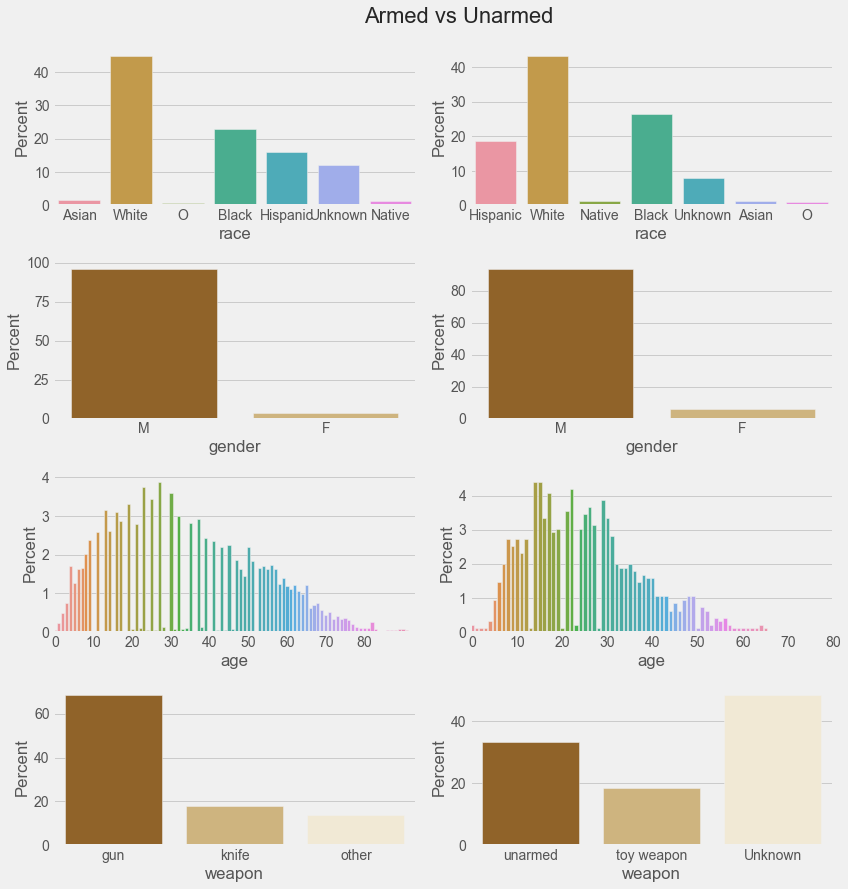

In [53]:
### plotting multiple variables comparing armed data and unarmed:

fig, axs = plt.subplots(4,2,figsize=(12, 12))
fig.suptitle('Armed vs Unarmed', x=0.54, y=1.03, fontsize=22)
sns.barplot(x='race', y='race', orient='v',ax=axs[0,0], data=armed_data,
                estimator=lambda x: len(x) / len(armed_data) * 100).set(ylabel='Percent')
sns.barplot(x='race', y='race', orient='v',ax=axs[0,1], data=unarmed_data,
                estimator=lambda x: len(x) / len(unarmed_data) * 100).set(ylabel='Percent')
## gender
sns.barplot(x='gender', y='gender', orient='v',ax=axs[1,0], data=armed_data,
                estimator=lambda x: len(x) / len(armed_data) * 100).set(ylabel='Percent')
sns.barplot(x='gender', y='gender', orient='v',ax=axs[1,1], data=unarmed_data,
                estimator=lambda x: len(x) / len(unarmed_data) * 100).set(ylabel='Percent')

## age
sns.barplot(x='age', y='age', orient='v',ax=axs[2,0], data=armed_data,
                estimator=lambda x: len(x) / len(armed_data) * 100).set(xticks=(range(0, 90, 10)),
                                                                        xticklabels=(range(0, 90, 10)), ylabel='Percent')
sns.barplot(x='age', y='age', orient='v',ax=axs[2,1], data=unarmed_data,
                estimator=lambda x: len(x) / len(unarmed_data) * 100).set(xticks=(range(0, 90, 10)),
                                                                        xticklabels=(range(0, 90, 10)), ylabel='Percent')


## weapon
sns.barplot(x='armed', y='armed', orient='v',ax=axs[3,0], data=armed_data,
                estimator=lambda x: len(x) / len(armed_data) * 100).set(ylabel='Percent', xlabel='weapon')
sns.barplot(x='armed', y='armed', orient='v',ax=axs[3,1], data=unarmed_data,
                estimator=lambda x: len(x) / len(unarmed_data) * 100).set(ylabel='Percent',xlabel='weapon')

plt.tight_layout()

* Race - both armed and unarmed data seems to be similar to each other.
* Gender - since the absolute majority of the victims are men i didn't expect to see any different pattern
* Age - both armed and unarmed victims' age distribution are peaked between late teens and mid 30s
* Weapon - most of the victims who were armed had a gun, while most of the unarmed labeled as 'Unknown' - which could be gun as well but the data doesn't tell us much more

# Question Number Five
## Is there any difference between the number of victims per 100K people for each state?
#### To answer this question:
* First, I creatd a dataframe with each state's demographic and socioeconomic factors
* Then, I created a column for the number of victims per 100K citizens to avoid the bias of larger states

In [54]:
## creating A dataframe by state:

data_by_state = df.groupby('state')['id'].count().reset_index()
data_by_state = data_by_state.merge(pop,on='state').merge(race_ratios,on='state').merge(socio_eco_factors, on='state')
data_by_state.rename(columns={'id': 'Number Of Victims', 'IncomePerCap': 'Income Per Capita'}, inplace = True)
data_by_state['victims per 100K citizens'] = data_by_state['Number Of Victims']/(data_by_state['TotalPop']/100000)
data_by_state = data_by_state.merge(crime_rate, on='state')
data_by_state.crime_rate = data_by_state.crime_rate.apply(lambda x: x.replace(',',''))
data_by_state.crime_rate = data_by_state.crime_rate.astype(float)

In [55]:
data_by_state.head()

state  Number Of Victims  TotalPop       Men     Women  Men_ratio  \
0    AK                 39    738565    386319    352246   0.523067   
1    AL                102   4850771   2350806   2499965   0.484625   
2    AR                 80   2977944   1461651   1516293   0.490826   
3    AZ                251   6809946   3385055   3424891   0.497075   
4    CA                784  38982847  19366579  19616268   0.496797   

   Women_ratio      White      Black   Hispanic     Native      Asian  \
0     0.476933  61.538304   3.056269   6.796547  13.768733   6.057875   
1     0.515375  65.930038  26.408666   4.088196   0.465869   1.278853   
2     0.509174  73.013810  15.351735   7.161115   0.569548   1.406086   
3     0.502925  55.601463   4.054267  30.888347   3.915325   3.043925   
4     0.503203  37.908368   5.544827  38.749987   0.353409  13.923941   

    Pacific  VotingAgeCitizen   Income  Income Per Capita    Poverty  \
0  1.190426            3311.0  72471.0            33194.5  10.189025   
1  0.029971            2857.0  41757.5            22174.0  18.166942   
2  0.234395            3006.5  41301.0            22018.0  18.352749   
3  0.176447            2907.5  51514.0            26125.0  17.170370   
4  0.354567            2921.0  65758.0            29054.5  15.160541   

   ChildPoverty  Professional    Service     Office  Construction  Production  \
0     13.439155     36.344760  17.605478  22.881520     12.502602   10.666676   
1     25.634724     32.767604  17.066305  23.593333      9.911812   16.658813   
2     25.397980     32.085530  17.367321  23.227318     10.722012   16.598132   
3     22.524003     34.301709  20.179820  25.784445      9.580030   10.012379   
4     18.928021     36.526169  18.996691  23.128153      9.639820   11.533099   

       Drive    Carpool   Transit      Walk  OtherTransp  WorkAtHome  \
0  67.231226  12.250652  1.454908  8.385811     6.114125    4.566151   
1  85.522449   8.777685  0.410492  1.232315     1.052020    3.003208   
2  82.683749  10.621151  0.386268  1.822285     1.264949    3.219735   
3  76.155885  11.093449  1.944451  2.073931     2.595039    5.994868   
4  73.806324  10.656175  4.833611  2.597862     2.499113    5.431947   

   MeanCommute     Employed  PrivateWork  PublicWork  SelfEmployed  \
0    19.162686  2713.982869    66.871808   26.721727      6.182757   
1    24.703109  2296.709808    78.961780   15.647968      5.197778   
2    21.716259  2295.915283    77.879048   15.765584      6.175886   
3    25.221217  2326.211026    78.926897   14.513907      6.255523   
4    28.796720  2658.708856    77.829875   13.766153      8.052346   

   FamilyWork  Unemployment  victims per 100K citizens  crime_rate  
0    0.221175      8.157018                   5.280510     4185.44  
1    0.189392      7.750819                   2.102759     3336.81  
2    0.181290      6.444187                   2.686417     3456.64  
3    0.163304      7.396296                   3.685785     3151.75  
4    0.175714      7.875660                   2.011141     2827.81

In [56]:
countries = [x for x in data_by_state.state]
rates = []
for country in countries:
        rates.append(((education['percent_completed_hs'].loc[education['state']==country]).median()))
data_by_state['HS_over_25'] = rates

In [57]:
data_by_state.head()

state  Number Of Victims  TotalPop       Men     Women  Men_ratio  \
0    AK                 39    738565    386319    352246   0.523067   
1    AL                102   4850771   2350806   2499965   0.484625   
2    AR                 80   2977944   1461651   1516293   0.490826   
3    AZ                251   6809946   3385055   3424891   0.497075   
4    CA                784  38982847  19366579  19616268   0.496797   

   Women_ratio      White      Black   Hispanic     Native      Asian  \
0     0.476933  61.538304   3.056269   6.796547  13.768733   6.057875   
1     0.515375  65.930038  26.408666   4.088196   0.465869   1.278853   
2     0.509174  73.013810  15.351735   7.161115   0.569548   1.406086   
3     0.502925  55.601463   4.054267  30.888347   3.915325   3.043925   
4     0.503203  37.908368   5.544827  38.749987   0.353409  13.923941   

    Pacific  VotingAgeCitizen   Income  Income Per Capita    Poverty  \
0  1.190426            3311.0  72471.0            33194.5  10.189025   
1  0.029971            2857.0  41757.5            22174.0  18.166942   
2  0.234395            3006.5  41301.0            22018.0  18.352749   
3  0.176447            2907.5  51514.0            26125.0  17.170370   
4  0.354567            2921.0  65758.0            29054.5  15.160541   

   ChildPoverty  Professional    Service     Office  Construction  Production  \
0     13.439155     36.344760  17.605478  22.881520     12.502602   10.666676   
1     25.634724     32.767604  17.066305  23.593333      9.911812   16.658813   
2     25.397980     32.085530  17.367321  23.227318     10.722012   16.598132   
3     22.524003     34.301709  20.179820  25.784445      9.580030   10.012379   
4     18.928021     36.526169  18.996691  23.128153      9.639820   11.533099   

       Drive    Carpool   Transit      Walk  OtherTransp  WorkAtHome  \
0  67.231226  12.250652  1.454908  8.385811     6.114125    4.566151   
1  85.522449   8.777685  0.410492  1.232315     1.052020    3.003208   
2  82.683749  10.621151  0.386268  1.822285     1.264949    3.219735   
3  76.155885  11.093449  1.944451  2.073931     2.595039    5.994868   
4  73.806324  10.656175  4.833611  2.597862     2.499113    5.431947   

   MeanCommute     Employed  PrivateWork  PublicWork  SelfEmployed  \
0    19.162686  2713.982869    66.871808   26.721727      6.182757   
1    24.703109  2296.709808    78.961780   15.647968      5.197778   
2    21.716259  2295.915283    77.879048   15.765584      6.175886   
3    25.221217  2326.211026    78.926897   14.513907      6.255523   
4    28.796720  2658.708856    77.829875   13.766153      8.052346   

   FamilyWork  Unemployment  victims per 100K citizens  crime_rate  HS_over_25  
0    0.221175      8.157018                   5.280510     4185.44       87.60  
1    0.189392      7.750819                   2.102759     3336.81       81.15  
2    0.181290      6.444187                   2.686417     3456.64       81.10  
3    0.163304      7.396296                   3.685785     3151.75       84.15  
4    0.175714      7.875660                   2.011141     2827.81       87.50

In [58]:
### Using plotly interactive figures to show the number of victims for each state

fig = go.Figure(data=go.Choropleth(
    locations=data_by_state['state'],
    z = data_by_state['victims per 100K citizens'],
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Deaths"
))

fig.update_layout(
    title_text = 'Victims per 100K citizens by state',
    geo_scope='usa'
)

fig.show()

* Seems like Alaske and New mexico are leading with the number of victims via police shootings.

* We can further ask what's the reason for that if there is any, let's look deeper into each state

### Let's further investigate some correlations between the number of victims and other numerical variables

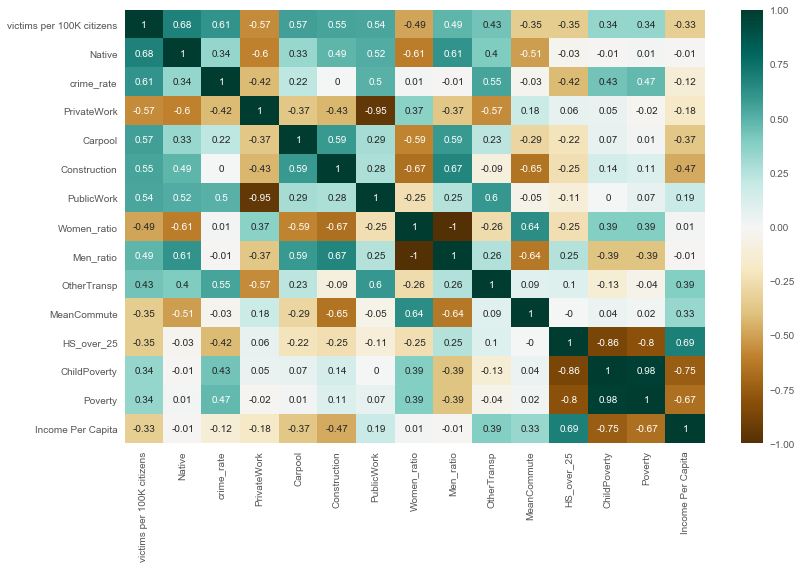

In [236]:
plt.style.use('ggplot')
top_cors = abs(data_by_state.corr()).nlargest(15, 'victims per 100K citizens').index
plt.figure(figsize = (12,8))
cormap = np.corrcoef(data_by_state[top_cors].values.T).round(2)
g = sns.heatmap(cormap, cbar=True, annot=True, cmap='BrBG',yticklabels = top_cors.values, xticklabels=top_cors.values)
plt.tight_layout()

## Few Insights Here:
1) *Crime rate* is a correlation coefficient of 0.61 which is very high and not surprising.

2) *Native* population is positively associated with the number of victims, this could be for a number of reasons, one of them is the correlation to crime rate which is 0.34.

3) A large *private work* sector is negatively correlated to the number of victims. while not correlated with Poverty, it is negatively correlated with crime rate, which maybe can tell us something about the importance of the private work sector.

4) *Education* - Again, im not surprised to see a negative correlation between the share of people who finished highschool and number of victims as well as crime rate. Education is important.

5) Some features are highly correlated to one another as they represent the same thing basically(child poverty - poverty, private work - public work etc..), it's important to mention that because it would be necessary to handle those features later when we perform regressions.


## Let's visualize some of the highly correlated features to have a better understanding about them
#### I plotted some of the variables using seaborn AND plotly just to have some different point of views

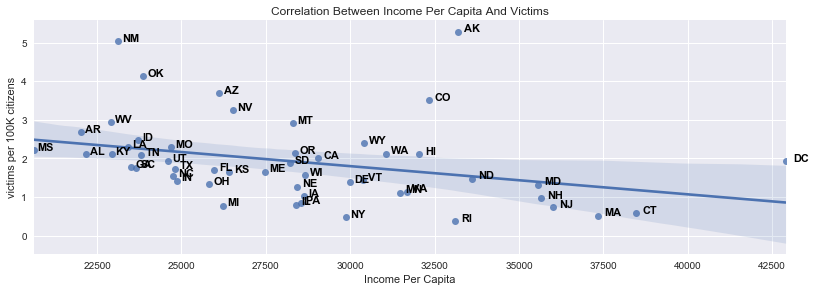

In [237]:
plt.figure(figsize=(12,4))
plt.style.use('seaborn')
g = sns.regplot(x='Income Per Capita', y='victims per 100K citizens', data=data_by_state)
for i in range(0,data_by_state.shape[0]):
     g.text(data_by_state['Income Per Capita'][i]*1.005, data_by_state['victims per 100K citizens'][i],
            data_by_state.state[i], horizontalalignment='left', size=11, color='black', weight='semibold')
title = plt.title('Correlation Between Income Per Capita And Victims')

In [61]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_by_state['Income Per Capita'],
                                y=data_by_state['victims per 100K citizens'],
                                mode='markers+text',
                                marker_color=data_by_state['victims per 100K citizens'],
                                text=data_by_state['state'],
                                textposition='top center'))
              

fig.update_layout(xaxis_title='Income Per Capita', yaxis_title = 'victims per 100K citizens',template ='ggplot2', title='Correlation Between Income Per Capita And Victims')
fig.show()

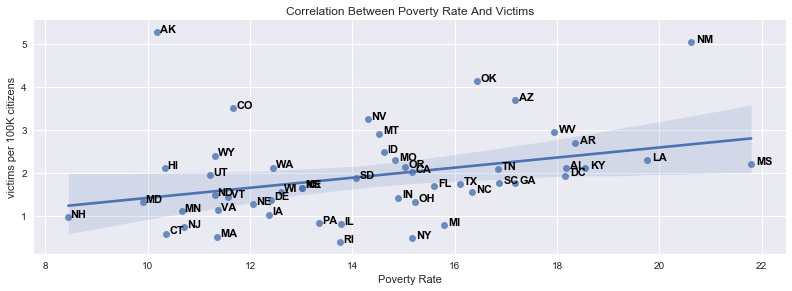

In [62]:
plt.figure(figsize=(12,4))
plt.style.use('seaborn')
g = sns.regplot(x='Poverty', y='victims per 100K citizens', data=data_by_state)
plt.xlabel('Poverty Rate')
for i in range(0,data_by_state.Poverty.shape[0]):
     g.text(data_by_state['Poverty'][i]*1.005, data_by_state['victims per 100K citizens'][i],
            data_by_state.state[i], horizontalalignment='left', size=11, color='black', weight='semibold')
title = plt.title('Correlation Between Poverty Rate And Victims')

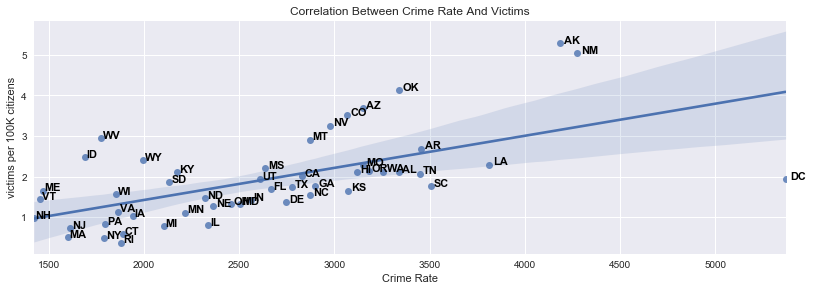

In [63]:
plt.figure(figsize=(12,4))
plt.style.use('seaborn')
g = sns.regplot(x='crime_rate', y='victims per 100K citizens', data=data_by_state)
plt.xlabel('Crime Rate')
for i in range(0,data_by_state.Poverty.shape[0]):
     g.text(data_by_state['crime_rate'][i]*1.005, data_by_state['victims per 100K citizens'][i],
            data_by_state.state[i], horizontalalignment='left', size=11, color='black', weight='semibold')
title = plt.title('Correlation Between Crime Rate And Victims')

In [64]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_by_state['crime_rate'],
                                y=data_by_state['victims per 100K citizens'],
                                mode='markers+text',
                                marker_color=data_by_state['victims per 100K citizens'],
                                text=data_by_state['state'],
                                textposition='top center'))
              

fig.update_layout(xaxis_title='Crime Rate', yaxis_title = 'Victims per 100K citizens',template ='ggplot2', title='Correlation Between Crime Rate And Victims')
fig.show()

# Alright, i hope you got some visual insights about our variables. Now moving on to the modelling
### The purpose of this stage is to create  a model which can predict with high accuracy the number of victims per 100K citizens using our features from the data. In order to do that:
1) I had a look at our target variable, and noticed it is slightly skewed, therefore i transformed it's values using log, and got an output of a nice normal distributed variable

2) I created an x variable by selecting features who seemed relevant for our predictions, while having in mind the correlations between each of them to one another and the variance they have - for example, i didn't include Men/Women, as well as child poverty becuase, as we've seen earlier, the absolute majority of victims are men, and child poverty and poverty are basically the same thing

3) After createing x and y, i performed a scaling transformation on x values in order to avoid biases towards some of the features

3) I then splitted the data into test and train while using 0.7 of the data to be for training

4) After all the feature engineering has done and the data is splitted and scaled, i performed multiple regressions  simultaneously using cross validation, and presented the results with a dataframe and box plots.

5) I repeated stage 2 with some different features to see if the accuracy improved(the mean squared error)

6) At this point, I chose the best model from the x who showed the best results, and used randomized search grid in order to improve the accuracy even more

7) Finally, i presented the features' coefficients of the model after tuning it, Enjoy!


In [65]:
### importing the packages

import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, GridSearchCV , RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from scipy.stats import norm
from scipy import stats
from sklearn.metrics import mean_squared_error 

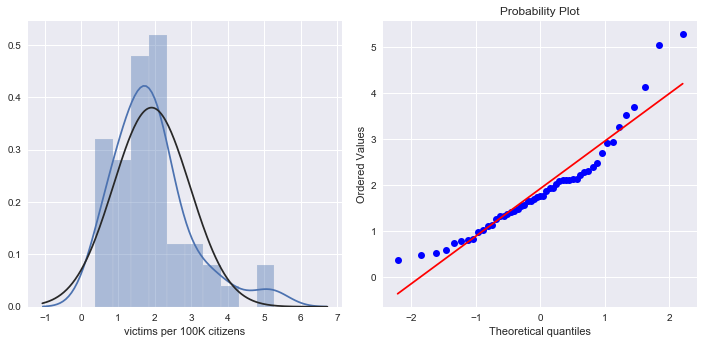

In [66]:
### performing a log transformation on the target variable

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(data_by_state['victims per 100K citizens'], fit=norm)

plt.subplot(1,2,2)
res = stats.probplot(data_by_state['victims per 100K citizens'], plot=plt)
plt.tight_layout()


In [67]:
y = np.log1p(data_by_state['victims per 100K citizens'].values)

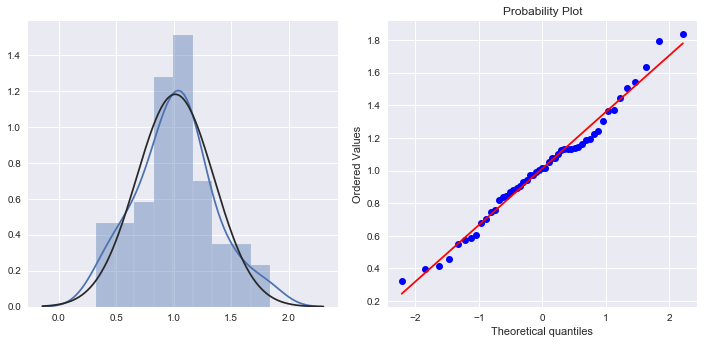

In [68]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
g = sns.distplot(y, fit=norm)

plt.subplot(1,2,2)
res = stats.probplot(y, plot=plt)

plt.tight_layout()

In [69]:
data_by_state.columns

Index(['state', 'Number Of Victims', 'TotalPop', 'Men', 'Women', 'Men_ratio',
       'Women_ratio', 'White', 'Black', 'Hispanic', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'Income', 'Income Per Capita', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment',
       'victims per 100K citizens', 'crime_rate', 'HS_over_25'],
      dtype='object')

In [70]:
### selecting the features for the first x

cols_to_use = ['state', 'TotalPop', 'Men_ratio',
       'White', 'Black', 'Hispanic', 'Native', 'Asian',
       'Pacific', 'Income Per Capita', 'Poverty',
       'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'PrivateWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment',
       'crime_rate', 'HS_over_25']


In [71]:
x = data_by_state[cols_to_use]

In [72]:
x = pd.get_dummies(x)

In [73]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [141]:
## splitting the data to train and test

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7)

In [102]:
# Defining a function which examines each model based on the score, then show each one's score and STD, as well as graphic comparison
# evaluate each model in turn
def get_scores(score1, score2,x_train,x_test):
    models = []
    models.append(('Lasso', Lasso()))
    models.append(('RandomForest', RandomForestRegressor()))
    models.append(('XGB', xgb.XGBRegressor(objective='reg:squarederror')))
    models.append(('LR', LinearRegression()))
    models.append(('SVR', SVR()))
    models.append(('Enet',ElasticNet()))
    models.append(('LightGBM',lgb.LGBMRegressor()))
    models.append(('Bayes',BayesianRidge()))
    models.append(('GB',GradientBoostingRegressor()))

    cv_scores = []
    test_scores = []
    names = []
    stds = []
    differences = []
    res = pd.DataFrame()
    for index, model in enumerate(models):
        kfold = KFold(n_splits=7)
        cv_results = abs(cross_val_score(model[1], x_train, y_train, cv=kfold, scoring=score1))
        cv_scores.append(cv_results)
        names.append(model[0])
        model[1].fit(x_train,y_train)
        predictions = model[1].predict(x_test)
        test_score = score2(predictions, y_test)
        test_scores.append(test_score)
        stds.append(cv_results.std())
        differences.append((cv_results.mean() - test_score))
        res.loc[index,'Model'] = model[0]
        res.loc[index,score1+('(CV)')] = cv_results.mean()
        res.loc[index,score1+('(Test_Data)')] = test_score
        res.loc[index,'Std'] = cv_results.std()
        res.loc[index,'difference'] = cv_results.mean() - test_score
    # boxplot algorithm comparison
    fig = plt.figure(figsize = (12,5))
    fig.suptitle('Model Comparison')
    ax = fig.add_subplot(121)
    plt.boxplot(cv_scores)
    ax.set_xticklabels(names, rotation=70)
    axs = fig.add_subplot(122)
    sns.barplot(names,test_scores)
    axs.set_xticklabels(names, rotation=70)
    plt.tight_layout(pad=5)
    return res
    plt.show()

    


Model  neg_mean_squared_error(CV)  \
0         Lasso                    0.093487   
1  RandomForest                    0.099819   
2           XGB                    0.130336   
3            LR                    0.084862   
4           SVR                    0.090920   
5          Enet                    0.093487   
6      LightGBM                    0.093487   
7         Bayes                    0.087449   
8            GB                    0.119756   

   neg_mean_squared_error(Test_Data)       Std  difference  
0                           0.179355  0.042506   -0.085868  
1                           0.210684  0.040227   -0.110865  
2                           0.212652  0.091926   -0.082315  
3                           0.177444  0.039598   -0.092581  
4                           0.181559  0.045844   -0.090638  
5                           0.179355  0.042506   -0.085868  
6                           0.179355  0.042506   -0.085868  
7                           0.177634  0.045648   -0.090185  
8                           0.215975  0.053232   -0.096219

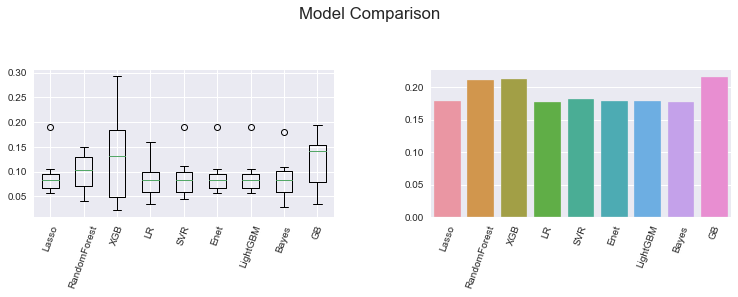

In [215]:
get_scores('neg_mean_squared_error', mean_squared_error, x_train, x_test)

In [143]:
## selecting the features for the second x

cols_to_use2 = ['TotalPop', 'Men_ratio',
       'White', 'Black', 'Hispanic', 'Native', 'Asian',
       'Pacific', 'Income Per Capita', 'Poverty',
       'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'PrivateWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment',
       'crime_rate', 'HS_over_25']
x2 = data_by_state[cols_to_use2]
scaler = StandardScaler()
x2 = scaler.fit_transform(x2)
x2_train, x2_test, y_train, y_test = train_test_split(x2,y,train_size=0.7)

Model  neg_mean_squared_error(CV)  \
0         Lasso                    0.093487   
1  RandomForest                    0.107818   
2           XGB                    0.156241   
3            LR                    1.981990   
4           SVR                    0.097162   
5          Enet                    0.093487   
6      LightGBM                    0.093487   
7         Bayes                    0.128188   
8            GB                    0.121620   

   neg_mean_squared_error(Test_Data)       Std  difference  
0                           0.179355  0.042506   -0.085868  
1                           0.215072  0.043411   -0.107254  
2                           0.247007  0.088457   -0.090766  
3                           2.511374  2.152812   -0.529384  
4                           0.276915  0.022457   -0.179754  
5                           0.179355  0.042506   -0.085868  
6                           0.179355  0.042506   -0.085868  
7                           0.178790  0.068272   -0.050602  
8                           0.249961  0.057743   -0.128341

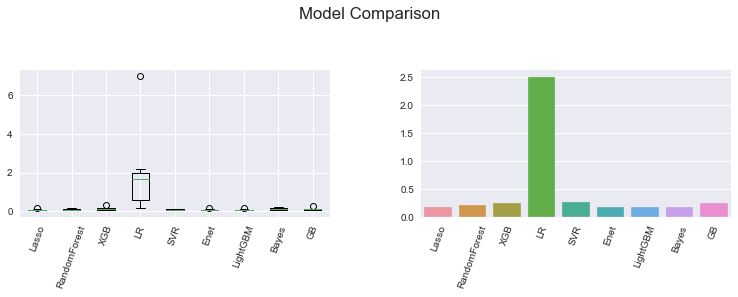

In [211]:
get_scores('neg_mean_squared_error', mean_squared_error, x2_train, x2_test)

In [229]:
### third x

cols_to_use3 = ['Men_ratio',
       'White', 'Black', 'Hispanic', 'Native', 'Asian',
       'Pacific', 'Income Per Capita', 'Poverty',
       'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'PrivateWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment',
       'crime_rate', 'HS_over_25']
x3 = data_by_state[cols_to_use3]
scaler = StandardScaler()
x3 = scaler.fit_transform(x3)
x3_train, x3_test, y_train, y_test = train_test_split(x3,y,train_size=0.7)

Model  neg_mean_squared_error(CV)  \
0         Lasso                    0.128302   
1  RandomForest                    0.062395   
2           XGB                    0.073877   
3            LR                    2.102318   
4           SVR                    0.052020   
5          Enet                    0.128302   
6      LightGBM                    0.128302   
7         Bayes                    0.044148   
8            GB                    0.087083   

   neg_mean_squared_error(Test_Data)       Std  difference  
0                           0.103680  0.074093    0.024622  
1                           0.034825  0.038366    0.027570  
2                           0.037443  0.038406    0.036434  
3                           0.172650  3.394712    1.929667  
4                           0.053931  0.028861   -0.001911  
5                           0.103680  0.074093    0.024622  
6                           0.103680  0.074093    0.024622  
7                           0.033433  0.014932    0.010716  
8                           0.031071  0.053879    0.056012

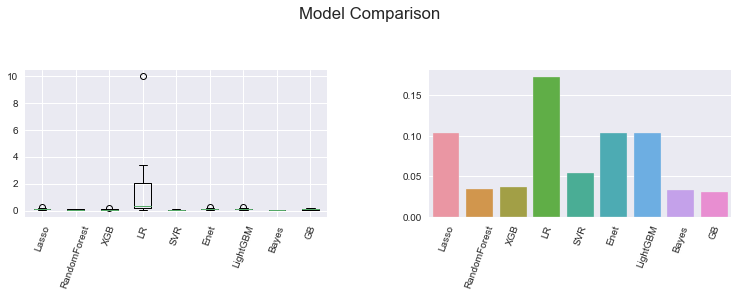

In [230]:
get_scores('neg_mean_squared_error', mean_squared_error,x3_train,x3_test)

## Gradient Booster  had the best results with the third x! let's now try to improve it using search grid!

In [231]:
params_GB = {'n_estimators':[100,200,500,800,1200],
    'max_depth':[10, 20, 30, 40, 50, 60, 70, None],
    'min_samples_split':[1,2,3,5],
    'min_samples_leaf':[1,2,3,5],
    'max_features': ['auto', 'sqrt'],
    'alpha':[0.03,0.06,0.09,0.5,0.9,2],
     'learning_rate':[0.1,0.2,0.5,0.8]}
model_GB=GradientBoostingRegressor()
randomgrid_GB = RandomizedSearchCV(estimator=model_GB, param_distributions = params_GB, 
                               cv=5, n_iter=25, scoring = 'neg_mean_squared_error',
                               n_jobs = 4, verbose = 3, random_state = 42,
                               return_train_score = True)

In [232]:
randomgrid_GB.fit(x3_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:    2.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [233]:
best_GB = randomgrid_GB.best_estimator_
GB_preds = best_GB.predict(x3_test)
mean_squared_error(GB_preds, y_test)

0.036170820501416

In [234]:
featuers_coefficients = best_GB.feature_importances_.round(6).tolist()
feature_names = cols_to_use3
feats = pd.DataFrame(pd.Series(featuers_coefficients, feature_names).sort_values(ascending=False),columns=['Coefficient'])
feats

Coefficient
crime_rate            0.196895
PrivateWork           0.138418
Native                0.135286
Carpool               0.126850
Construction          0.081782
Pacific               0.044664
HS_over_25            0.040108
Hispanic              0.030082
Service               0.028256
SelfEmployed          0.025869
Asian                 0.024317
OtherTransp           0.017444
Men_ratio             0.015049
Production            0.014802
Unemployment          0.009930
FamilyWork            0.009629
MeanCommute           0.008947
Income Per Capita     0.007187
WorkAtHome            0.006952
Office                0.006305
Professional          0.005433
Poverty               0.005290
Drive                 0.004730
White                 0.004552
Black                 0.004203
Transit               0.003784
Walk                  0.003235

# Thank You!